In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.metrics import confusion_matrix

   Class  Alcohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_Intensity   Hue  OD280/OD315_of_Diluted_Wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

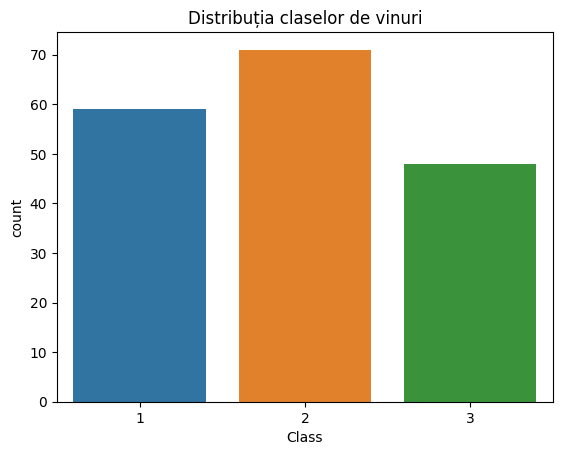

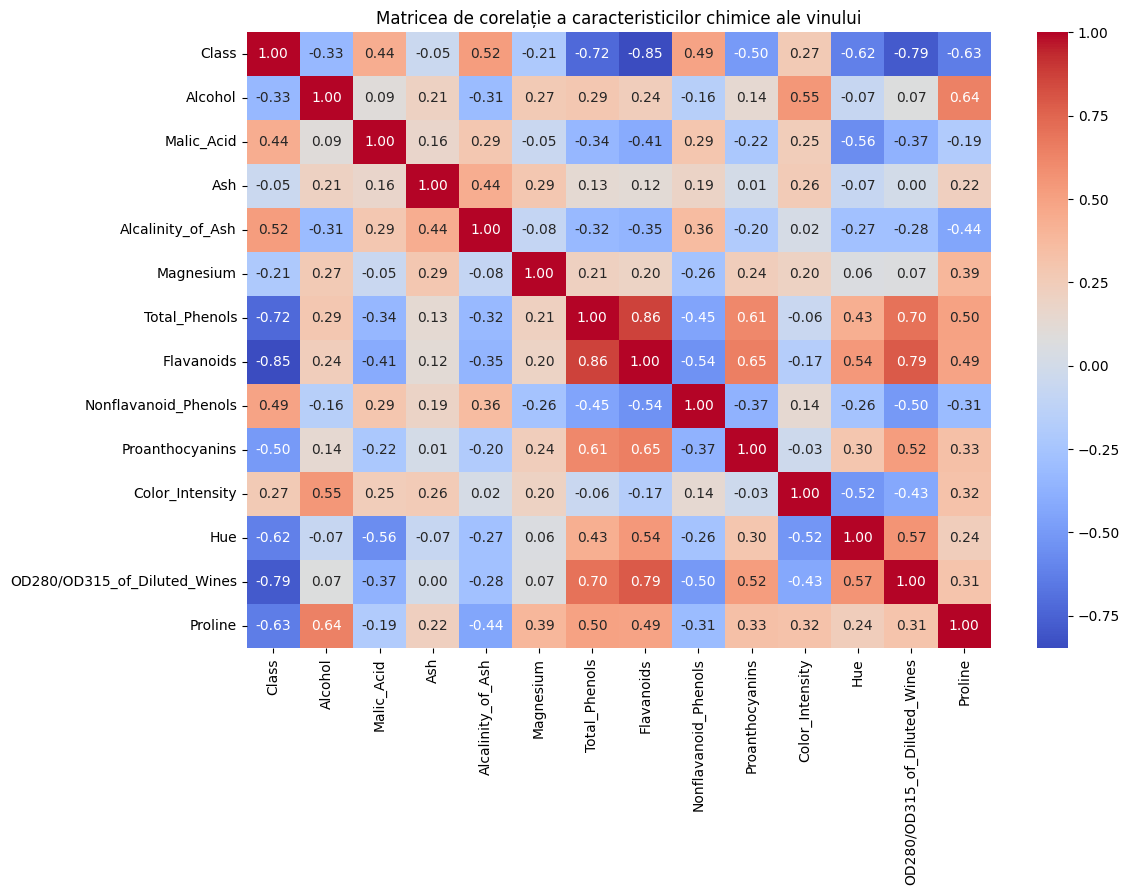

In [1]:
# Definim numele coloanelor conform wine.names
column_names = [
    "Class", "Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium",
    "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins",
    "Color_Intensity", "Hue", "OD280/OD315_of_Diluted_Wines", "Proline"
]

# Încarcăm setul de date
df = pd.read_csv("wine.data", names=column_names)

# Afisăm primele 5 rânduri
print(df.head())

# Verificăm informațiile despre dataset
print(df.info())

# Verificăm statisticile datasetului
print(df.describe())

# Vizualizăm distribuția claselor
sns.countplot(x=df["Class"])
plt.title("Distribuția claselor de vinuri")
plt.show()

# Matricea de corelație
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matricea de corelație a caracteristicilor chimice ale vinului")
plt.show()


Valori lipsă în setul de date:
 Class                           0
Alcohol                         0
Malic_Acid                      0
Ash                             0
Alcalinity_of_Ash               0
Magnesium                       0
Total_Phenols                   0
Flavanoids                      0
Nonflavanoid_Phenols            0
Proanthocyanins                 0
Color_Intensity                 0
Hue                             0
OD280/OD315_of_Diluted_Wines    0
Proline                         0
dtype: int64
    Alcohol  Malic_Acid       Ash  Alcalinity_of_Ash  Magnesium  \
0  0.842105    0.191700  0.572193           0.257732   0.619565   
1  0.571053    0.205534  0.417112           0.030928   0.326087   
2  0.560526    0.320158  0.700535           0.412371   0.336957   
3  0.878947    0.239130  0.609626           0.319588   0.467391   
4  0.581579    0.365613  0.807487           0.536082   0.521739   

   Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
0    

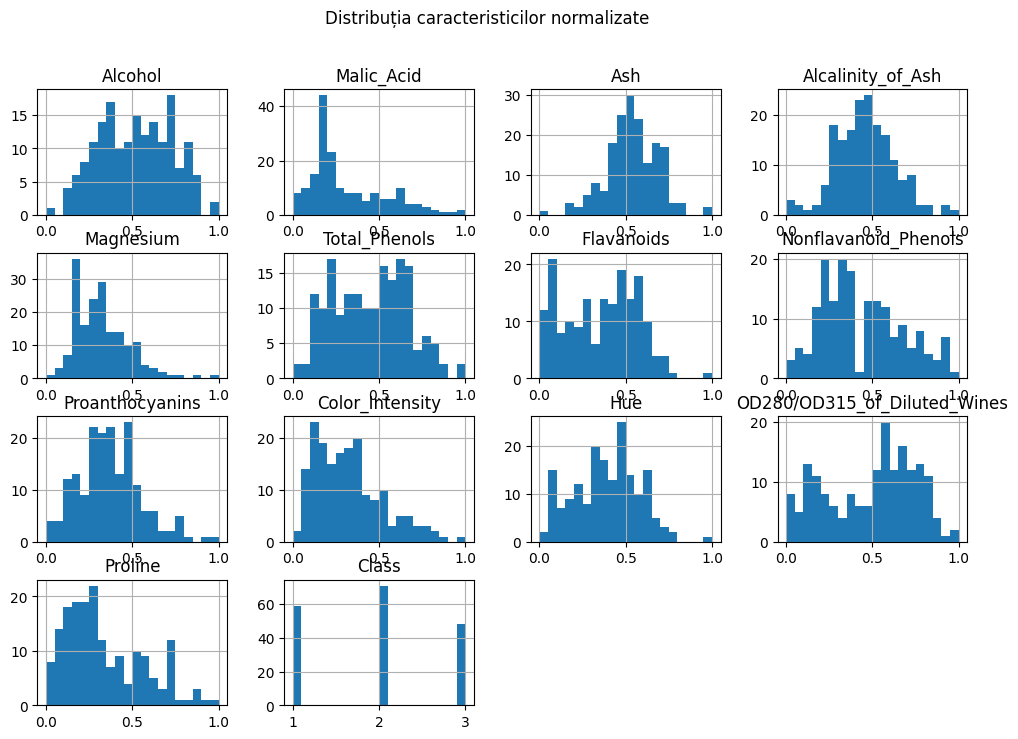

In [4]:
# Verificăm dacă există valori lipsă
print("Valori lipsă în setul de date:\n", df.isnull().sum())

# Dacă există valori lipsă, le completăm cu media fiecărei coloane
df.fillna(df.mean(), inplace=True)

# Separăm caracteristicile de eticheta de clasificare
X = df.drop("Class", axis=1)  # Caracteristicile
y = df["Class"]  # Eticheta

# Normalizăm caracteristicile folosind MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convertim în DataFrame pentru vizualizare mai ușoară
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled["Class"] = y  # Adăugăm din nou eticheta

# Afișăm primele 5 rânduri după normalizare
print(df_scaled.head())

# Verificăm statistici după normalizare
print(df_scaled.describe())

# Vizualizăm distribuția caracteristicilor normalizate
df_scaled.hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribuția caracteristicilor normalizate")
plt.show()

C:\Users\Mihai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mihai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mihai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Mihai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

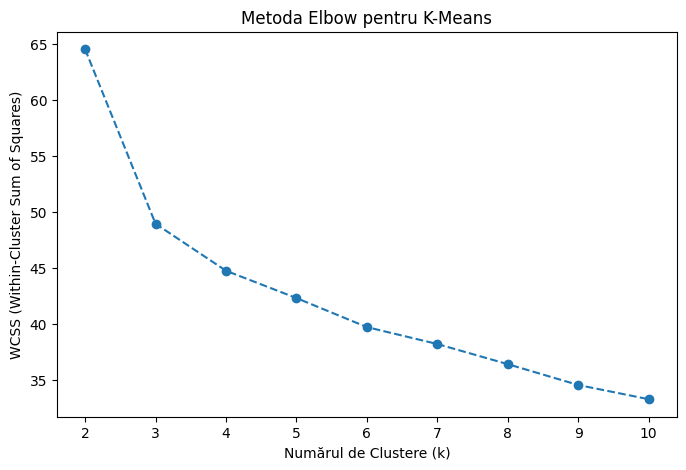

In [7]:
# Aplicăm metoda Elbow pentru a găsi numărul optim de clustere pentru K-Means
wcss = []
K_range = range(2, 11)  # Încercăm valori de la 2 la 10 pentru k

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia = suma pătratelor distanțelor până la centrul clusterului

# Vizualizăm metoda Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o', linestyle='--')
plt.xlabel('Numărul de Clustere (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Metoda Elbow pentru K-Means')
plt.show()

In [8]:
# Alegem k=3 (din observația graficului)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_scaled["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)

# Calculăm și afișăm scorul silhouette pentru K-Means
kmeans_silhouette = silhouette_score(X_scaled, df_scaled["KMeans_Cluster"])
print(f"Silhouette Score pentru K-Means: {kmeans_silhouette:.2f}")

# Aplicăm DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajustăm eps și min_samples dacă e necesar
df_scaled["DBSCAN_Cluster"] = dbscan.fit_predict(X_scaled)

# Verificăm câte clustere a identificat DBSCAN
print("Cluster labels DBSCAN:", np.unique(df_scaled["DBSCAN_Cluster"]))

# Silhouette Score pentru DBSCAN (se calculează doar dacă avem cel puțin 2 clustere)
if len(np.unique(df_scaled["DBSCAN_Cluster"])) > 1:
    dbscan_silhouette = silhouette_score(X_scaled, df_scaled["DBSCAN_Cluster"])
    print(f"Silhouette Score pentru DBSCAN: {dbscan_silhouette:.2f}")
else:
    print("DBSCAN nu a format suficiente clustere pentru a calcula Silhouette Score.")

C:\Users\Mihai\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score pentru K-Means: 0.30
Cluster labels DBSCAN: [-1  0  1]
Silhouette Score pentru DBSCAN: 0.23


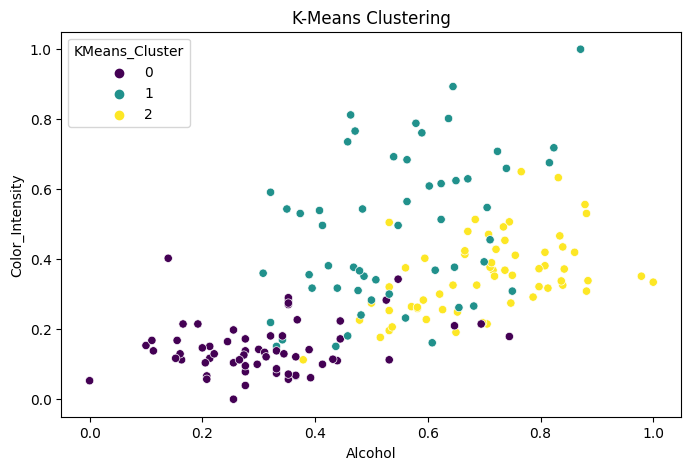

In [9]:
# Vizualizăm rezultatele clusteringului K-Means
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled["Alcohol"], y=df_scaled["Color_Intensity"], hue=df_scaled["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clustering")
plt.show()

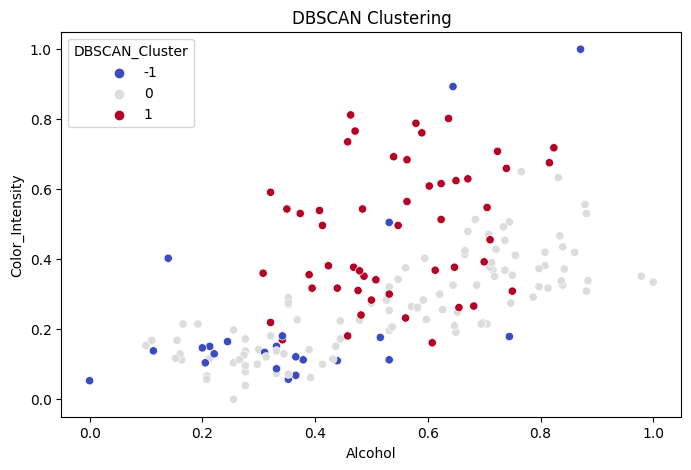

In [10]:
# Vizualizăm rezultatele clusteringului DBSCAN
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_scaled["Alcohol"], y=df_scaled["Color_Intensity"], hue=df_scaled["DBSCAN_Cluster"], palette="coolwarm")
plt.title("DBSCAN Clustering")
plt.show()

Matrice de confuzie pentru K-Means:
 Clustere K-Means   0   1   2
Etichete Reale              
1                  0   0  59
2                 62   7   2
3                  0  48   0
Matrice de confuzie pentru DBSCAN:
 Clustere DBSCAN  -1   0   1
Etichete Reale             
1                 1  58   0
2                20  46   5
3                 2   0  46


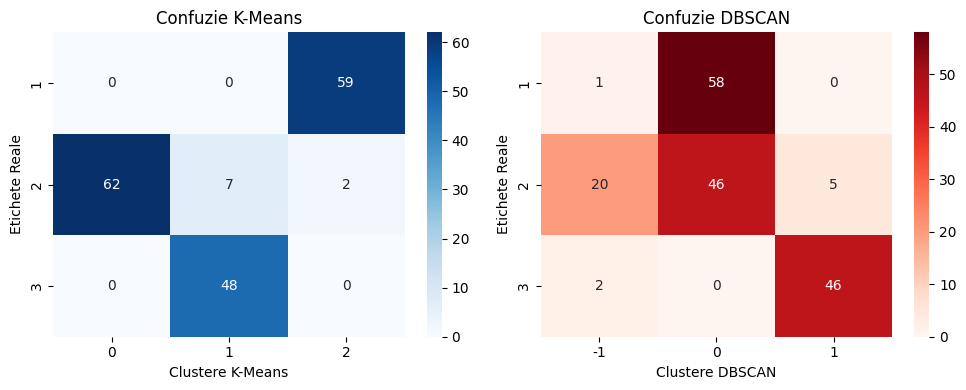

In [12]:
# Comparăm K-Means cu etichetele originale
conf_matrix_kmeans = pd.crosstab(df_scaled["Class"], df_scaled["KMeans_Cluster"], rownames=["Etichete Reale"], colnames=["Clustere K-Means"])
print("Matrice de confuzie pentru K-Means:\n", conf_matrix_kmeans)

# Comparăm DBSCAN cu etichetele originale
conf_matrix_dbscan = pd.crosstab(df_scaled["Class"], df_scaled["DBSCAN_Cluster"], rownames=["Etichete Reale"], colnames=["Clustere DBSCAN"])
print("Matrice de confuzie pentru DBSCAN:\n", conf_matrix_dbscan)

# Vizualizare matrici de confuzie
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_kmeans, annot=True, cmap="Blues", fmt="d")
plt.title("Confuzie K-Means")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_dbscan, annot=True, cmap="Reds", fmt="d")
plt.title("Confuzie DBSCAN")

plt.tight_layout()
plt.show()